In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import os
from itertools import combinations
import missingno
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("adData.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
num_rows, num_cols = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 10000
Number of columns: 10


In [5]:
# 가장 오래 머문 시간과 가장 짧게 머문 시간 찾기
max_time_spent = data['Daily Time Spent on Site'].max()
min_time_spent = data['Daily Time Spent on Site'].min()

print(f"가장 오래 머문 시간: {max_time_spent} 분")
print(f"가장 짧게 머문 시간: {min_time_spent} 분")

가장 오래 머문 시간: 90.97 분
가장 짧게 머문 시간: 32.6 분


In [6]:
data.columns = data.columns.str.replace(" ", "_")
print(data.columns)

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic_Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')


In [7]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Daily_Time_Spent_on_Sit │   0 │     0 │     62 │     16 │     33 │     49 │    60 │    77 │    91 │ ▆▅▇▅▆▅ │  │
│ │ e                       │     │       │        │        │        │        │       │       │       │        │  │
│ │ Age                     │   0 │     0 │     36 │    8.6 │     19 │     29 │    35 │    42 │    60 │ ▃▇▇▅▃▁ │  │
│ │ Area_Income             │   0 │     0 │  54000 │  13000 │  14000 │  44000 │ 56000 │ 62000 │ 79000 │ ▁▃▃▇▇▃ │  │
│ │ Daily_Internet_Usage    │   0 │     0 │    180 │     41 │    110 │    140 │   180 │   210 │   270 │ ▇▆▇▇▇▁ │  │
│ │ Clicked_on_Ad           │   0 │     0 │   0.49 │    0.5 │      0 │      0 │     0 │     1 │     1 │ ▇    ▇ │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Ad_Topic_Line                │      0 │          0 │                         3.2 │                   31734 │  │
│ │ City                         │      0 │          0 │                         1.5 │                   14593 │  │
│ │ Gender                       │      0 │          0 │                           1 │                   10000 │  │
│ │ Country                      │      0 │          0 │                         1.4 │                   13841 │  │
│ │ Timestamp                    │      0 │          0 │                           2 │                   20000 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area_Income               10000 non-null  float64
 3   Daily_Internet_Usage      10000 non-null  float64
 4   Ad_Topic_Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked_on_Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


<Axes: >

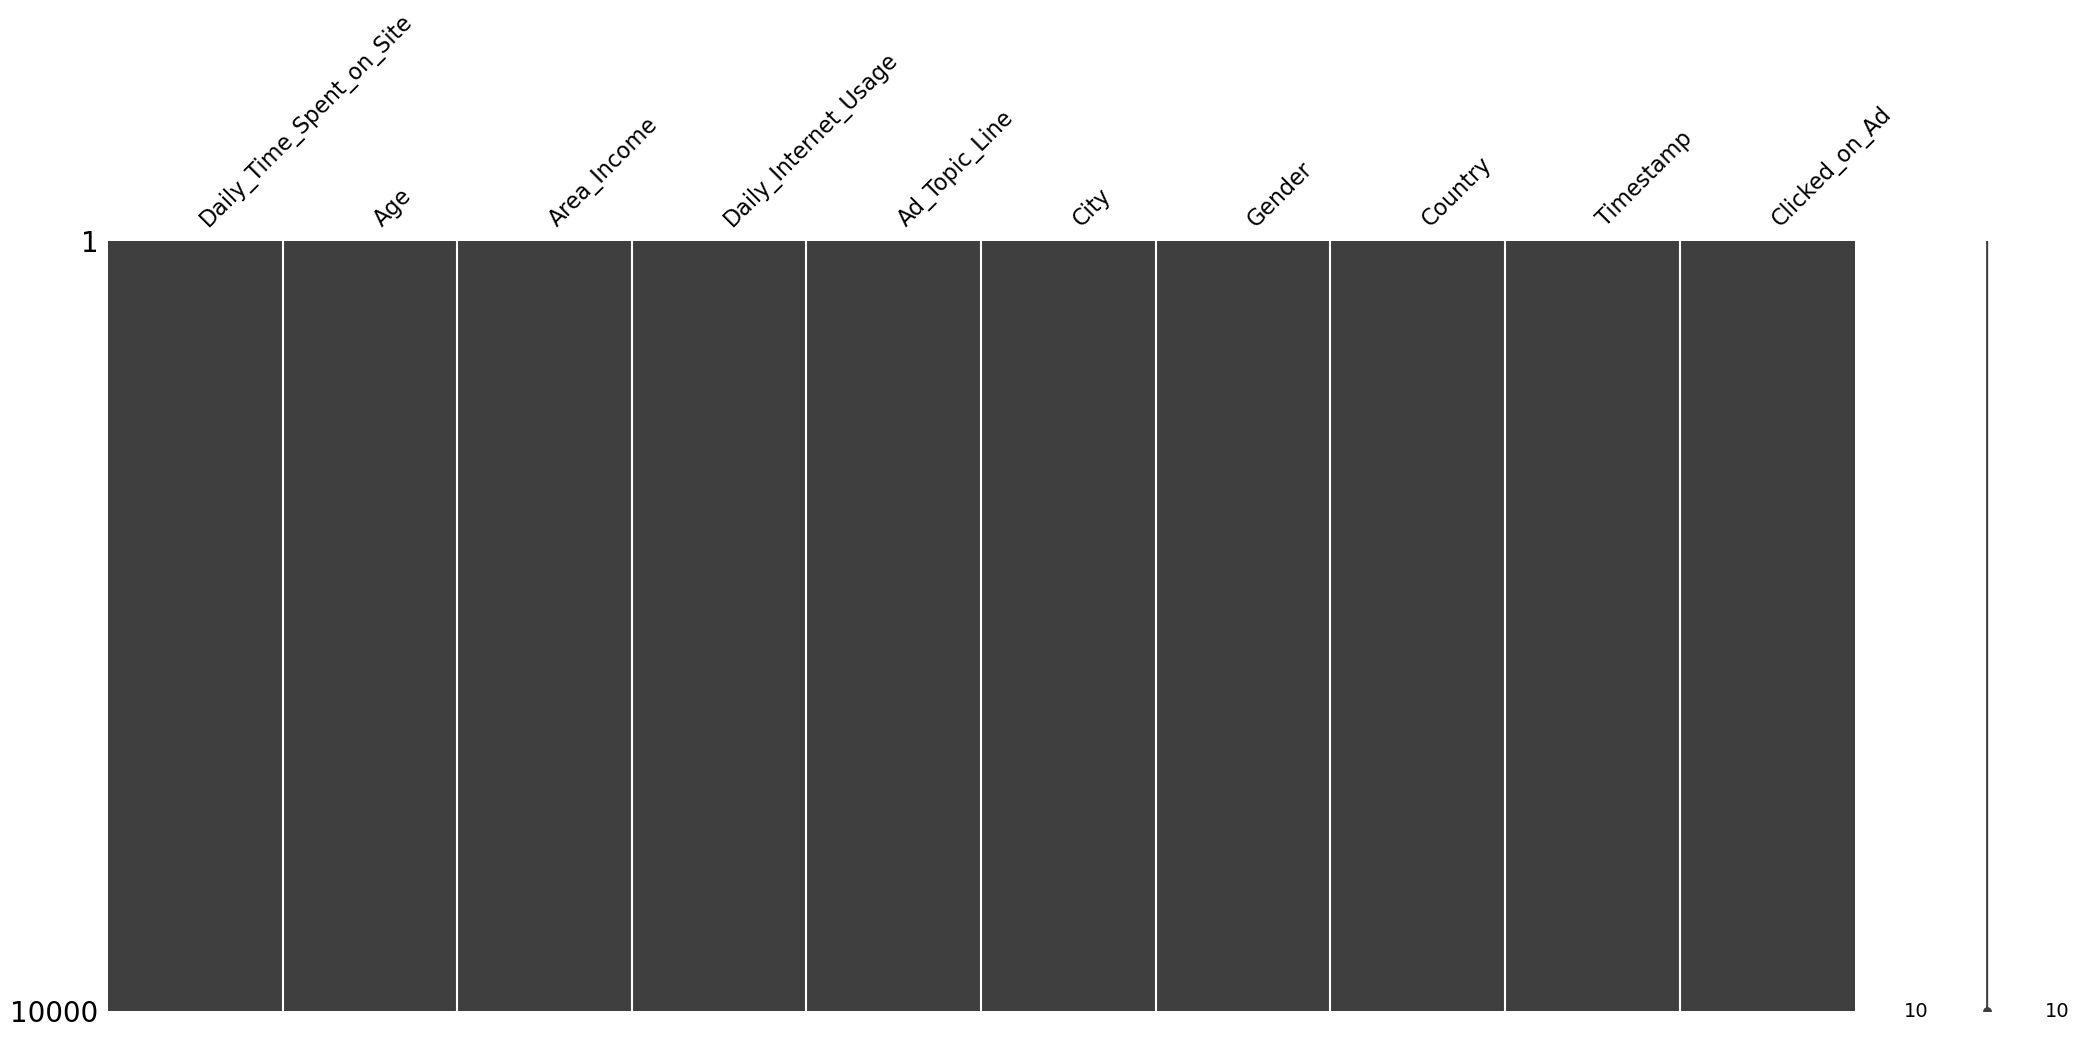

In [9]:
# 결측치 시각화
missingno.matrix(data)

In [10]:
print(data.isnull().sum())
print(data.duplicated().sum())

Daily_Time_Spent_on_Site    0
Age                         0
Area_Income                 0
Daily_Internet_Usage        0
Ad_Topic_Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked_on_Ad               0
dtype: int64
215


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
print(len(data['Ad_Topic_Line']))
print(len(data['Ad_Topic_Line'].unique()))

9785
559


#### 데이터타입 변환

In [13]:
for each_coloumn in ["City","Gender", "Country", "Clicked_on_Ad", "Ad_Topic_Line"]:
    data[each_coloumn] = data[each_coloumn].astype("category")

In [14]:
# for each_coloumn in ["Ad_Topic_Line", "City", "Gender", "Country", "Clicked_on_Ad"]:
#     data[each_coloumn] = data[each_coloumn].astype("category")

In [15]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [16]:
# year은 모두 2016년도로 동일하기 때문에 무의미할 것이라고 판단하고 분리하지 않음
data['month'] = data['Timestamp'].dt.month
data['day'] = data['Timestamp'].dt.day
data['hour'] = data['Timestamp'].dt.hour

In [17]:
for each_coloumn in ["month","day", "hour"]:
    data[each_coloumn] = data[each_coloumn].astype("category")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily_Time_Spent_on_Site  9785 non-null   float64       
 1   Age                       9785 non-null   float64       
 2   Area_Income               9785 non-null   float64       
 3   Daily_Internet_Usage      9785 non-null   float64       
 4   Ad_Topic_Line             9785 non-null   category      
 5   City                      9785 non-null   category      
 6   Gender                    9785 non-null   category      
 7   Country                   9785 non-null   category      
 8   Timestamp                 9785 non-null   datetime64[ns]
 9   Clicked_on_Ad             9785 non-null   category      
 10  month                     9785 non-null   category      
 11  day                       9785 non-null   category      
 12  hour                     

In [19]:
for cat_col in ["City", "Gender", "Country", "Ad_Topic_Line", "Clicked_on_Ad", "month", "day", "hour"]:
    print(data[cat_col].value_counts())
    data[cat_col] = data[cat_col].cat.codes
    data[cat_col] = data[cat_col].astype("category")

City
Hubbardmouth         330
Lisafort             235
Wintersfort          225
Reyesfurt            205
Stewartbury          204
                    ... 
East Troyhaven         1
South Ronald           1
South Pamela           1
Josephberg             1
South Christopher      1
Name: count, Length: 521, dtype: int64
Gender
Female    5268
Male      4517
Name: count, dtype: int64
Country
Australia         346
Czech Republic    325
Turkey            296
Qatar             222
Hong Kong         221
                 ... 
Monaco              1
Paraguay            1
Seychelles          1
Sierra Leone        1
Jamaica             1
Name: count, Length: 207, dtype: int64
Ad_Topic_Line
Cloned explicit middleware                323
Sharable reciprocal project               187
Business-focused transitional solution    186
Intuitive exuding service-desk            173
Managed client-server access              152
                                         ... 
Profound stable product                

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily_Time_Spent_on_Site  9785 non-null   float64       
 1   Age                       9785 non-null   float64       
 2   Area_Income               9785 non-null   float64       
 3   Daily_Internet_Usage      9785 non-null   float64       
 4   Ad_Topic_Line             9785 non-null   category      
 5   City                      9785 non-null   category      
 6   Gender                    9785 non-null   category      
 7   Country                   9785 non-null   category      
 8   Timestamp                 9785 non-null   datetime64[ns]
 9   Clicked_on_Ad             9785 non-null   category      
 10  month                     9785 non-null   category      
 11  day                       9785 non-null   category      
 12  hour                     

In [21]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Gender,Country,Timestamp,Clicked_on_Ad,month,day,hour
0,62.26,32.0,69481.85,172.83,96,234,1,174,2016-06-09 21:43:05,0,5,8,21
1,41.73,31.0,61840.26,207.17,301,460,1,166,2016-01-16 17:56:05,0,0,15,17
2,44.40,30.0,57877.15,172.83,484,379,0,71,2016-06-29 10:50:45,0,5,28,10
3,59.88,28.0,56180.93,207.17,24,269,0,205,2016-06-21 14:32:32,0,5,20,14
4,49.21,30.0,54324.73,201.58,484,495,0,149,2016-07-21 10:54:35,1,6,20,10


In [22]:
data.describe()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Timestamp
count,9785.000000,9785.000000,9785.000000,9785.000000,9785
mean,61.601379,35.839550,53948.143348,177.886144,2016-04-10 16:01:57.960245248
min,32.600000,19.000000,13996.500000,105.220000,2016-01-01 02:52:10
25%,48.030000,29.000000,44174.250000,140.150000,2016-02-26 01:18:44
50%,59.590000,35.000000,56180.930000,178.920000,2016-04-06 05:55:43
75%,76.270000,41.000000,62669.590000,212.870000,2016-06-03 03:36:18
max,90.970000,60.000000,79332.330000,269.960000,2016-07-23 11:46:28
std,15.698216,8.538524,13360.051625,40.861875,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily_Time_Spent_on_Site  9785 non-null   float64       
 1   Age                       9785 non-null   float64       
 2   Area_Income               9785 non-null   float64       
 3   Daily_Internet_Usage      9785 non-null   float64       
 4   Ad_Topic_Line             9785 non-null   category      
 5   City                      9785 non-null   category      
 6   Gender                    9785 non-null   category      
 7   Country                   9785 non-null   category      
 8   Timestamp                 9785 non-null   datetime64[ns]
 9   Clicked_on_Ad             9785 non-null   category      
 10  month                     9785 non-null   category      
 11  day                       9785 non-null   category      
 12  hour                     

### EDA

In [24]:
data_num=data[["Daily_Time_Spent_on_Site", "Age", "Area_Income", "Daily_Internet_Usage"]]
data_num.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage
0,62.26,32.0,69481.85,172.83
1,41.73,31.0,61840.26,207.17
2,44.40,30.0,57877.15,172.83
3,59.88,28.0,56180.93,207.17
4,49.21,30.0,54324.73,201.58


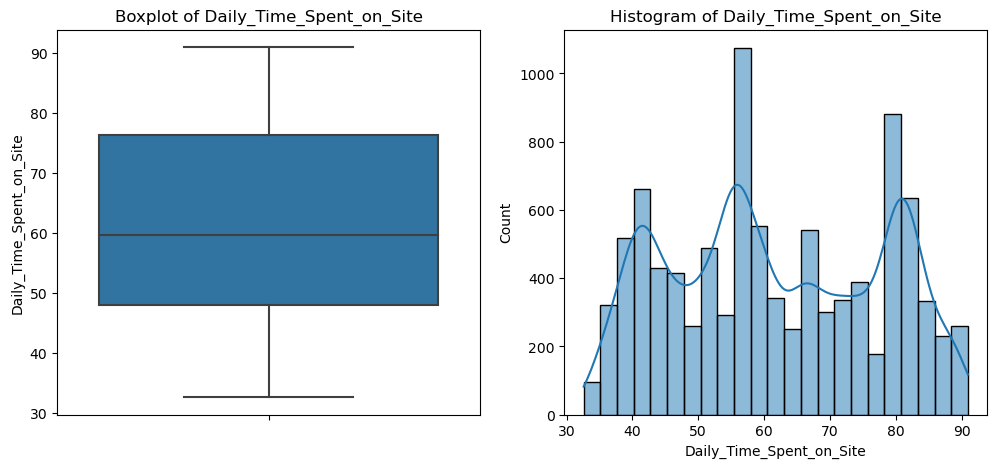

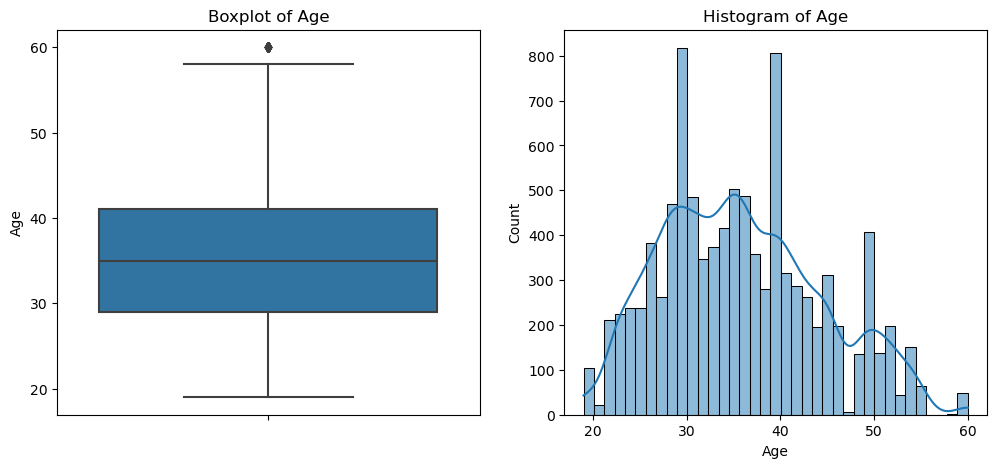

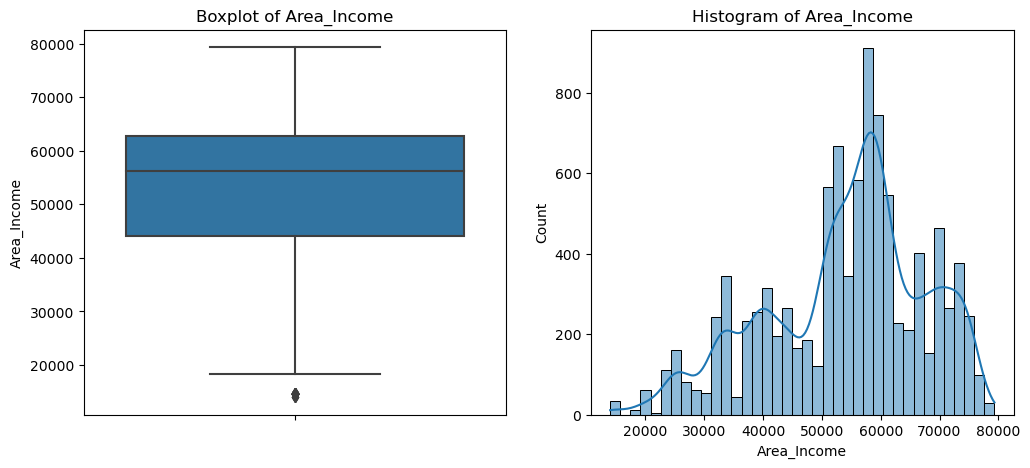

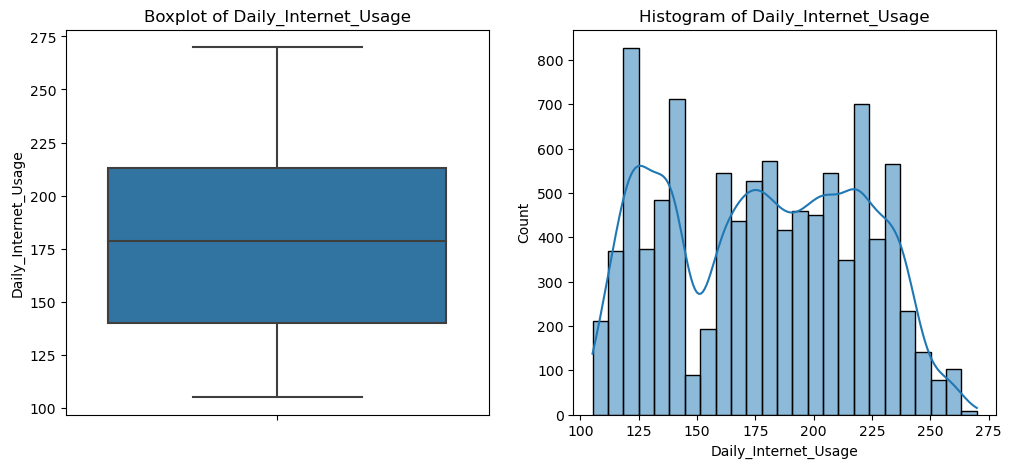

In [25]:
#numerical
for column in data_num.columns:
        plt.figure(figsize=(12, 5))
        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(y=data_num[column])
        plt.title(f'Boxplot of {column}')
        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(data_num[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()

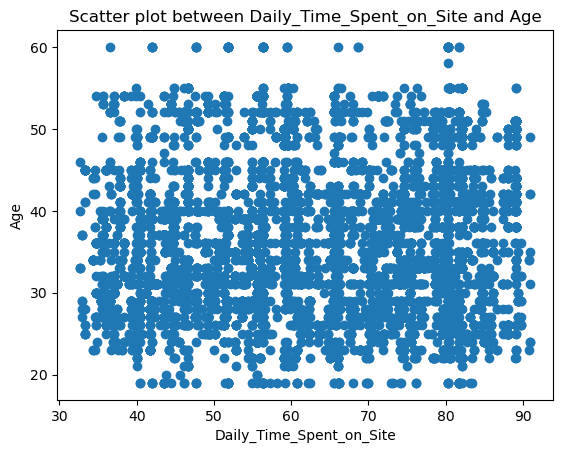

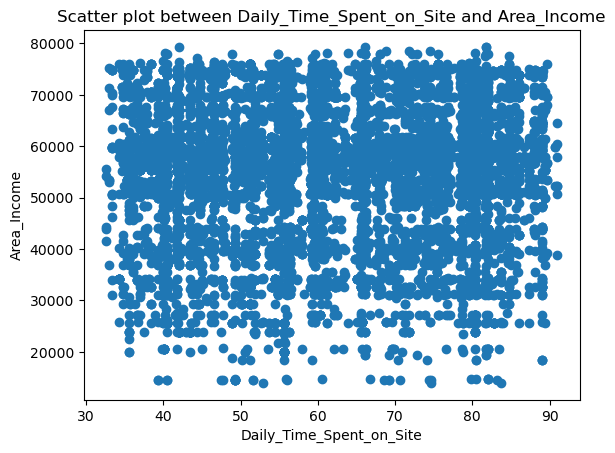

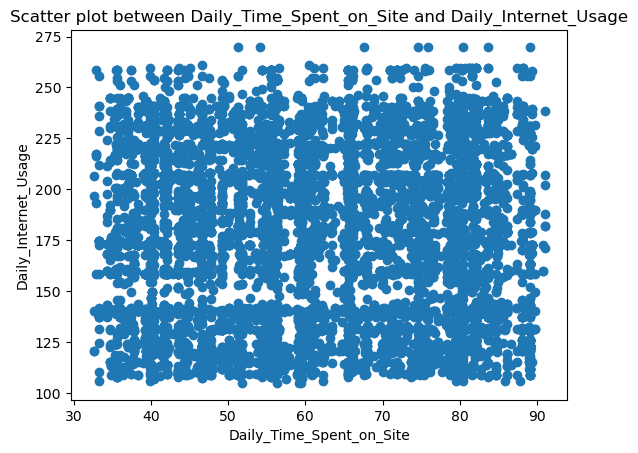

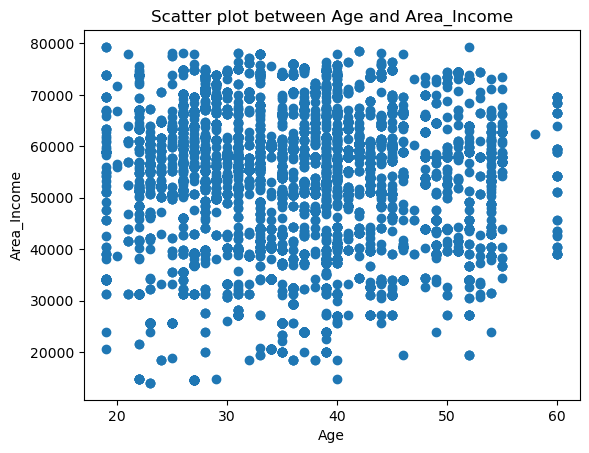

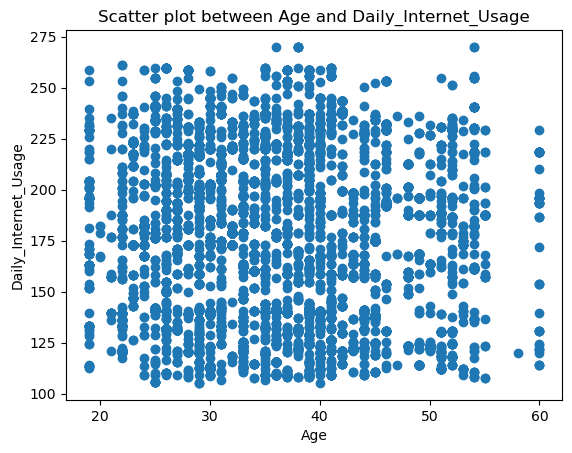

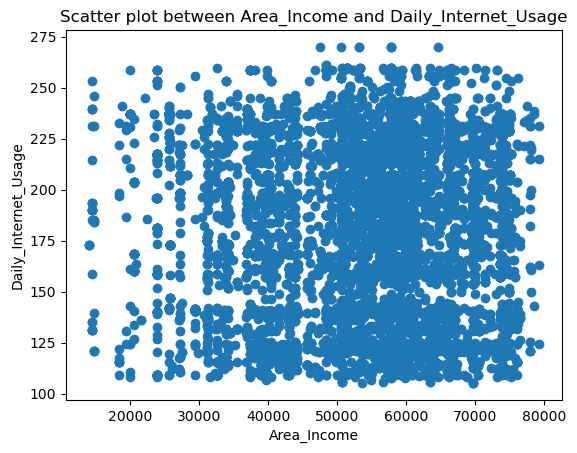

In [26]:
combinations_of_num_col = list(combinations(data_num.columns, 2))

for (col1, col2) in combinations_of_num_col:
    plt.figure()
    plt.scatter(data_num[col1], data_num[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter plot between {col1} and {col2}')
    plt.show()

In [27]:
data_categorical = ['Ad_Topic_Line', 'City', 'Gender', 'Country', 'Clicked_on_Ad', 'month','day', 'hour']

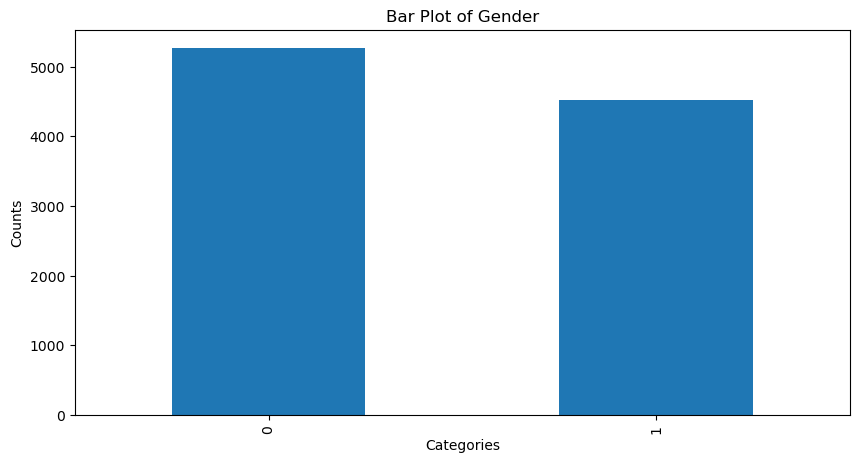

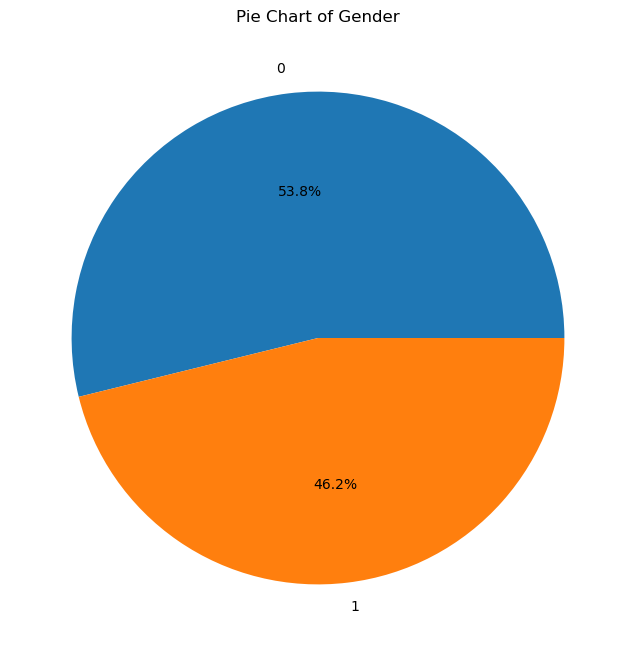

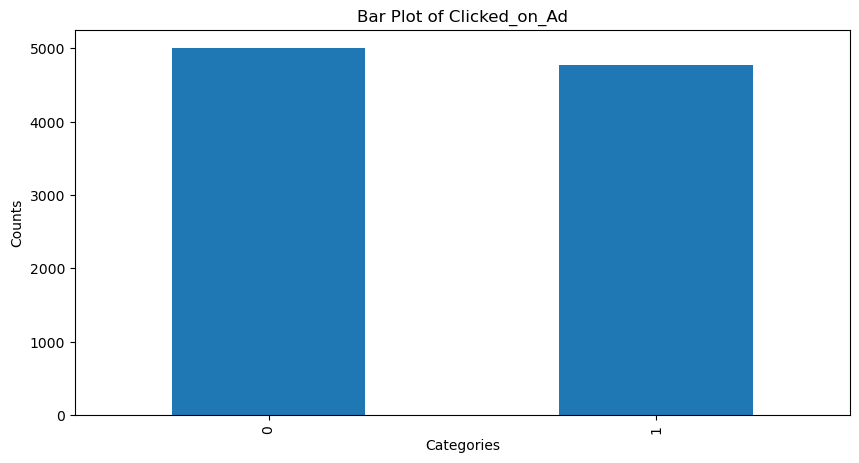

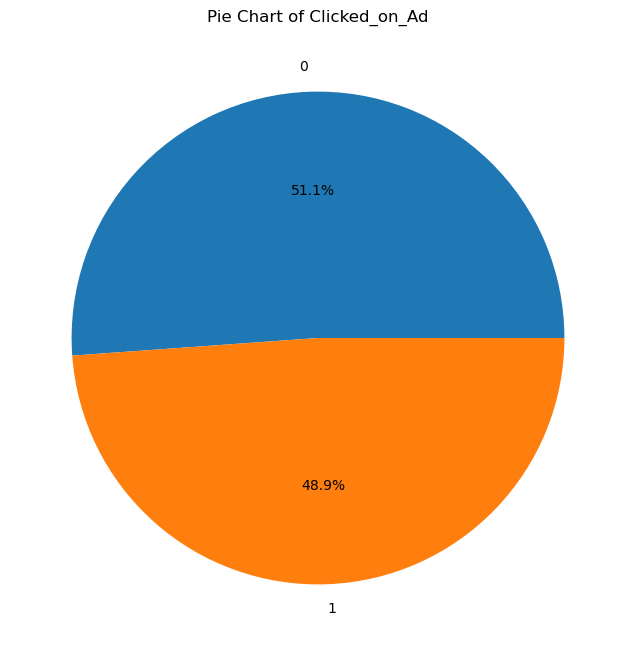

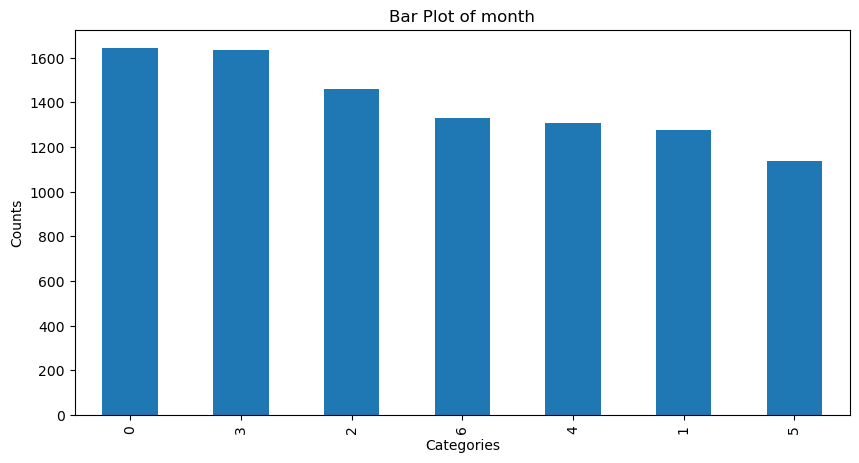

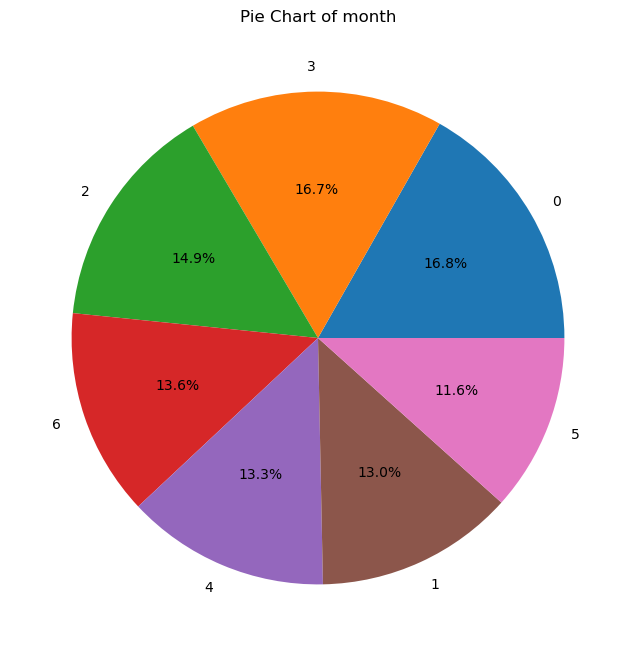

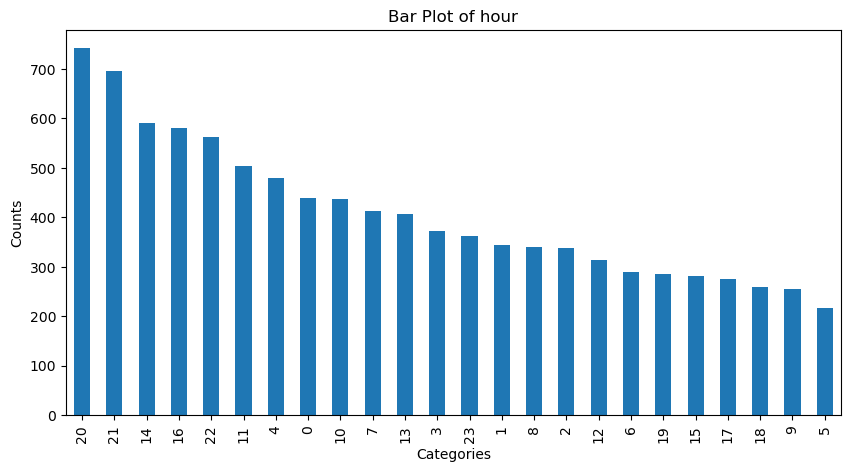

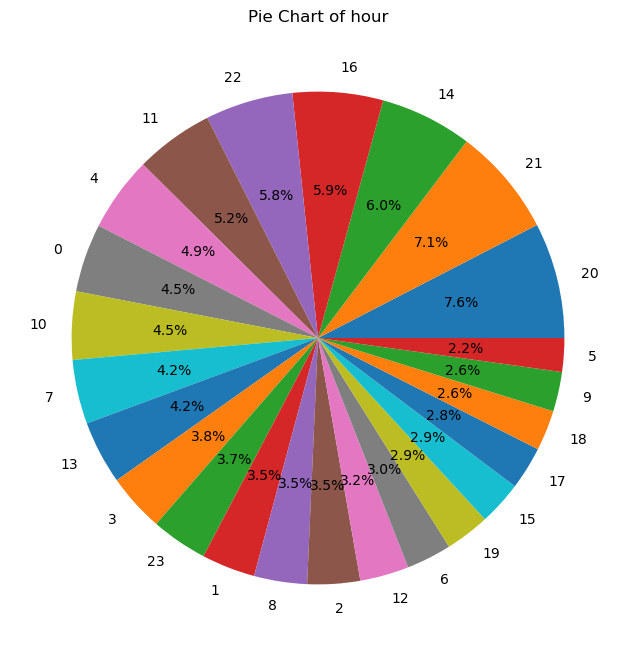

In [28]:
for column in data_categorical:
    if len(data[column].unique())<30 :  # because some columns have a lot of unique values and this does not visualize well in bar plot and pie plot 
        count_data = data[column].value_counts()

        # Creating a bar plot
        plt.figure(figsize=(10, 5))
        count_data.plot(kind='bar')
        plt.title(f'Bar Plot of {column}')
        plt.ylabel('Counts')
        plt.xlabel('Categories')
        plt.show()

        # Creating a pie chart
        plt.figure(figsize=(8, 8))
        count_data.plot(kind='pie', autopct='%1.1f%%')  # autopct shows the percentage on the pie chart
        plt.title(f'Pie Chart of {column}')
        plt.ylabel('')  # Remove the y-label as it's not necessary for pie charts
        plt.show()

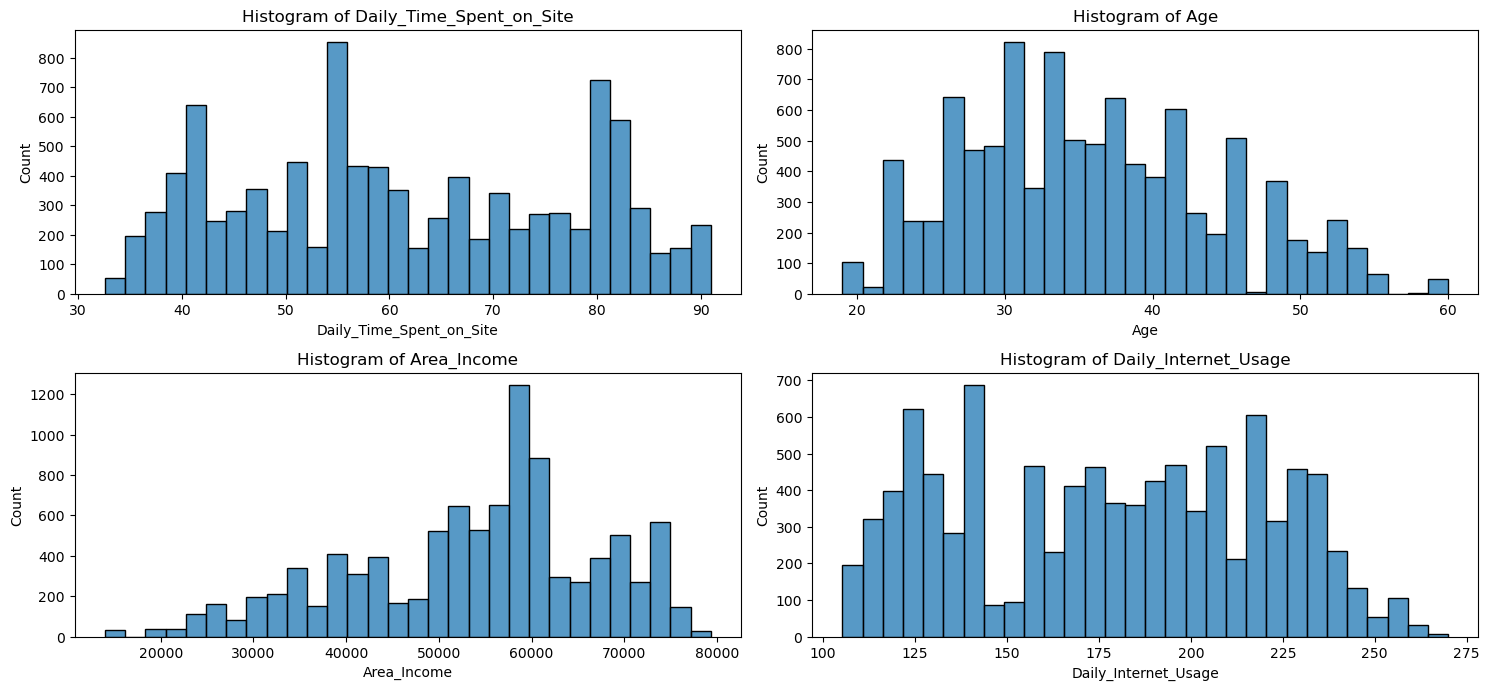

In [29]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(data_num):
    plt.subplot(3, 2, i+1)  
    sns.histplot(data[var], kde=False, bins=30)
    plt.title(f'Histogram of {var}')
    plt.tight_layout()

plt.show()

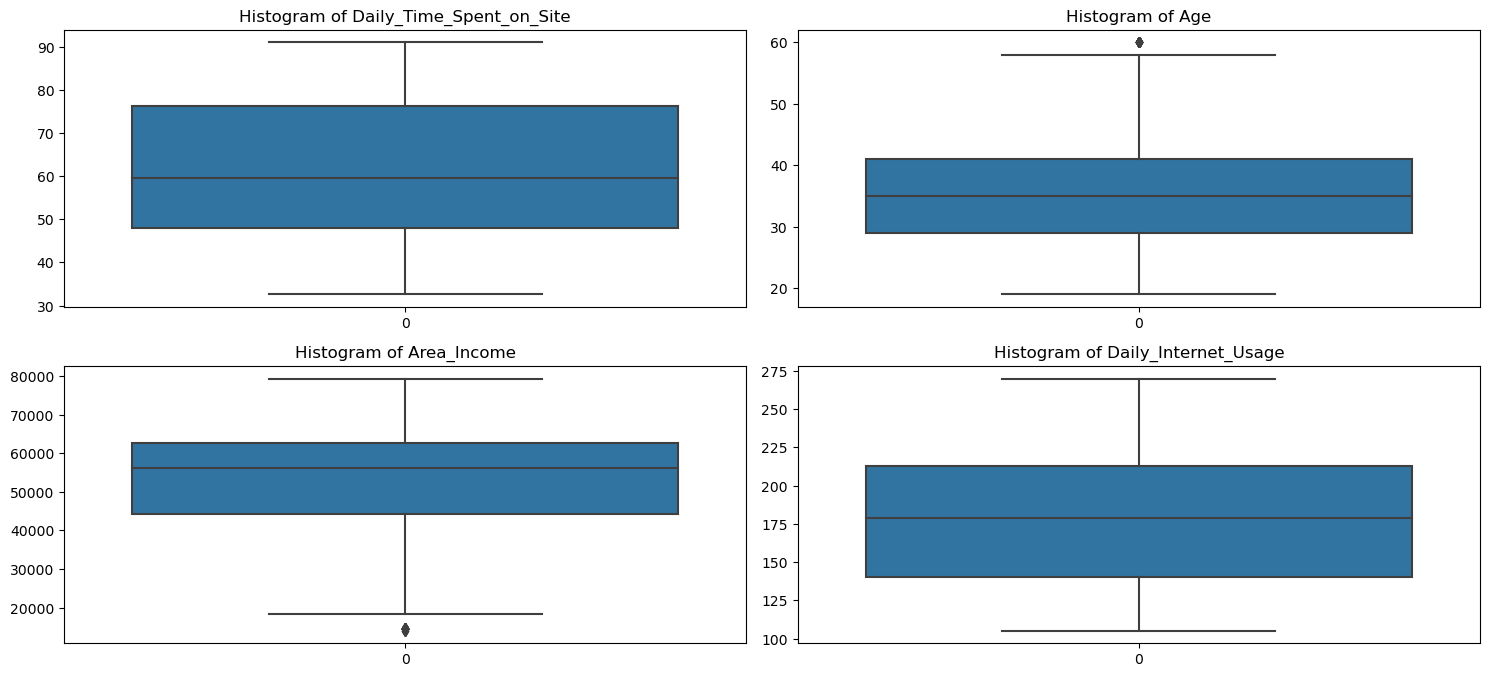

In [30]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(data_num):
    plt.subplot(3, 2, i+1) 
    sns.boxplot(data[var])
    plt.title(f'Histogram of {var}')
    plt.tight_layout()

plt.show()

In [31]:
data_num.columns

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage'],
      dtype='object')

Text(0.5, 1.0, 'Count of Clicked on Ad')

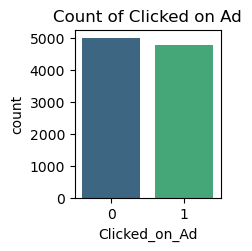

In [32]:
plt.subplot(2, 3, 1)
sns.countplot(x='Clicked_on_Ad', data=data, palette='viridis')
plt.title('Count of Clicked on Ad')

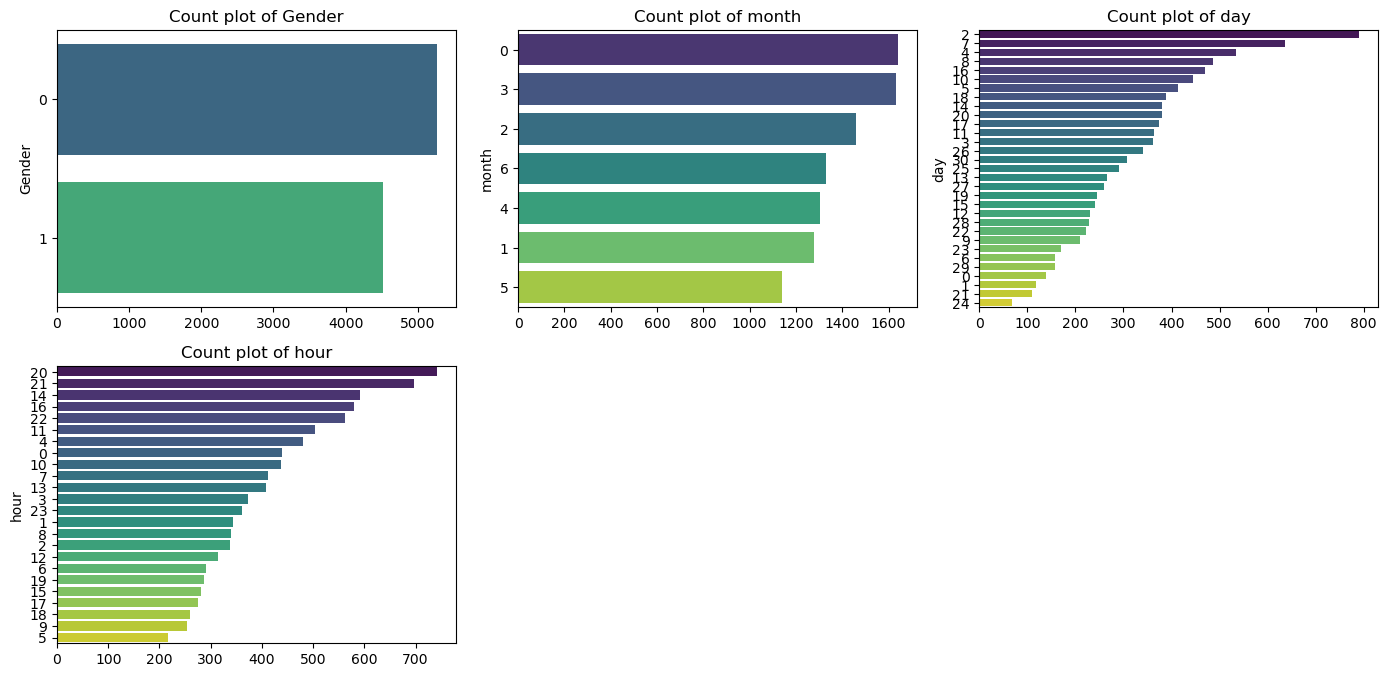

In [33]:
plt.figure(figsize=(14, 10))
categorical_vars = ['Gender', 'month', 'day', 'hour']
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=var, data=data, palette='viridis', order=data[var].value_counts().index)
    plt.title(f'Count plot of {var}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

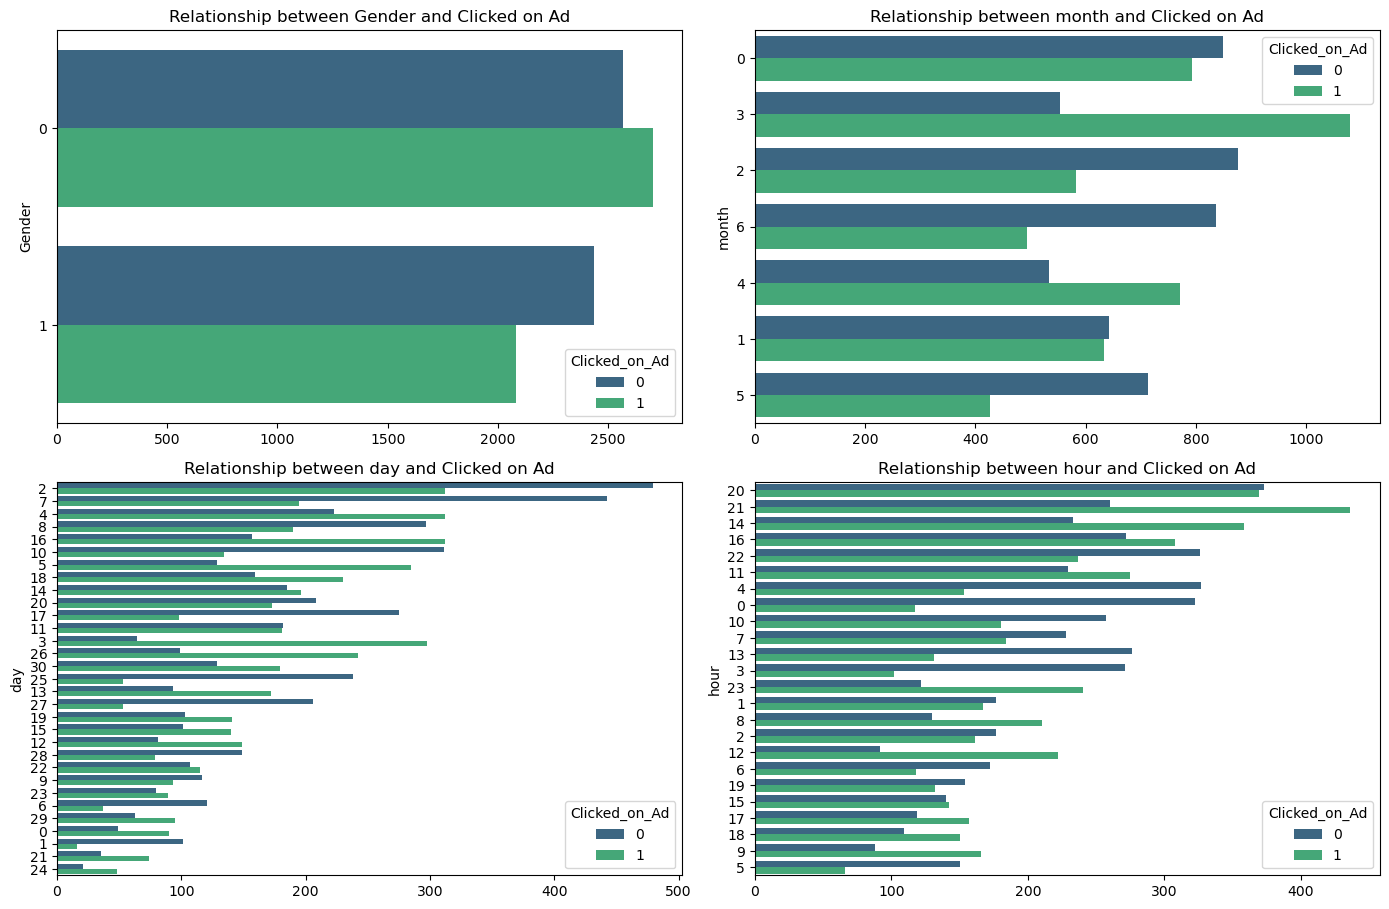

In [34]:
plt.figure(figsize=(14, 18))
for i, var in enumerate(categorical_vars):
    plt.subplot(4, 2, i + 1)
    sns.countplot(y=var, hue='Clicked_on_Ad', data=data, palette='viridis', order=data[var].value_counts().index)
    plt.title(f'Relationship between {var} and Clicked on Ad')
    plt.xlabel('')
plt.tight_layout()
plt.show()

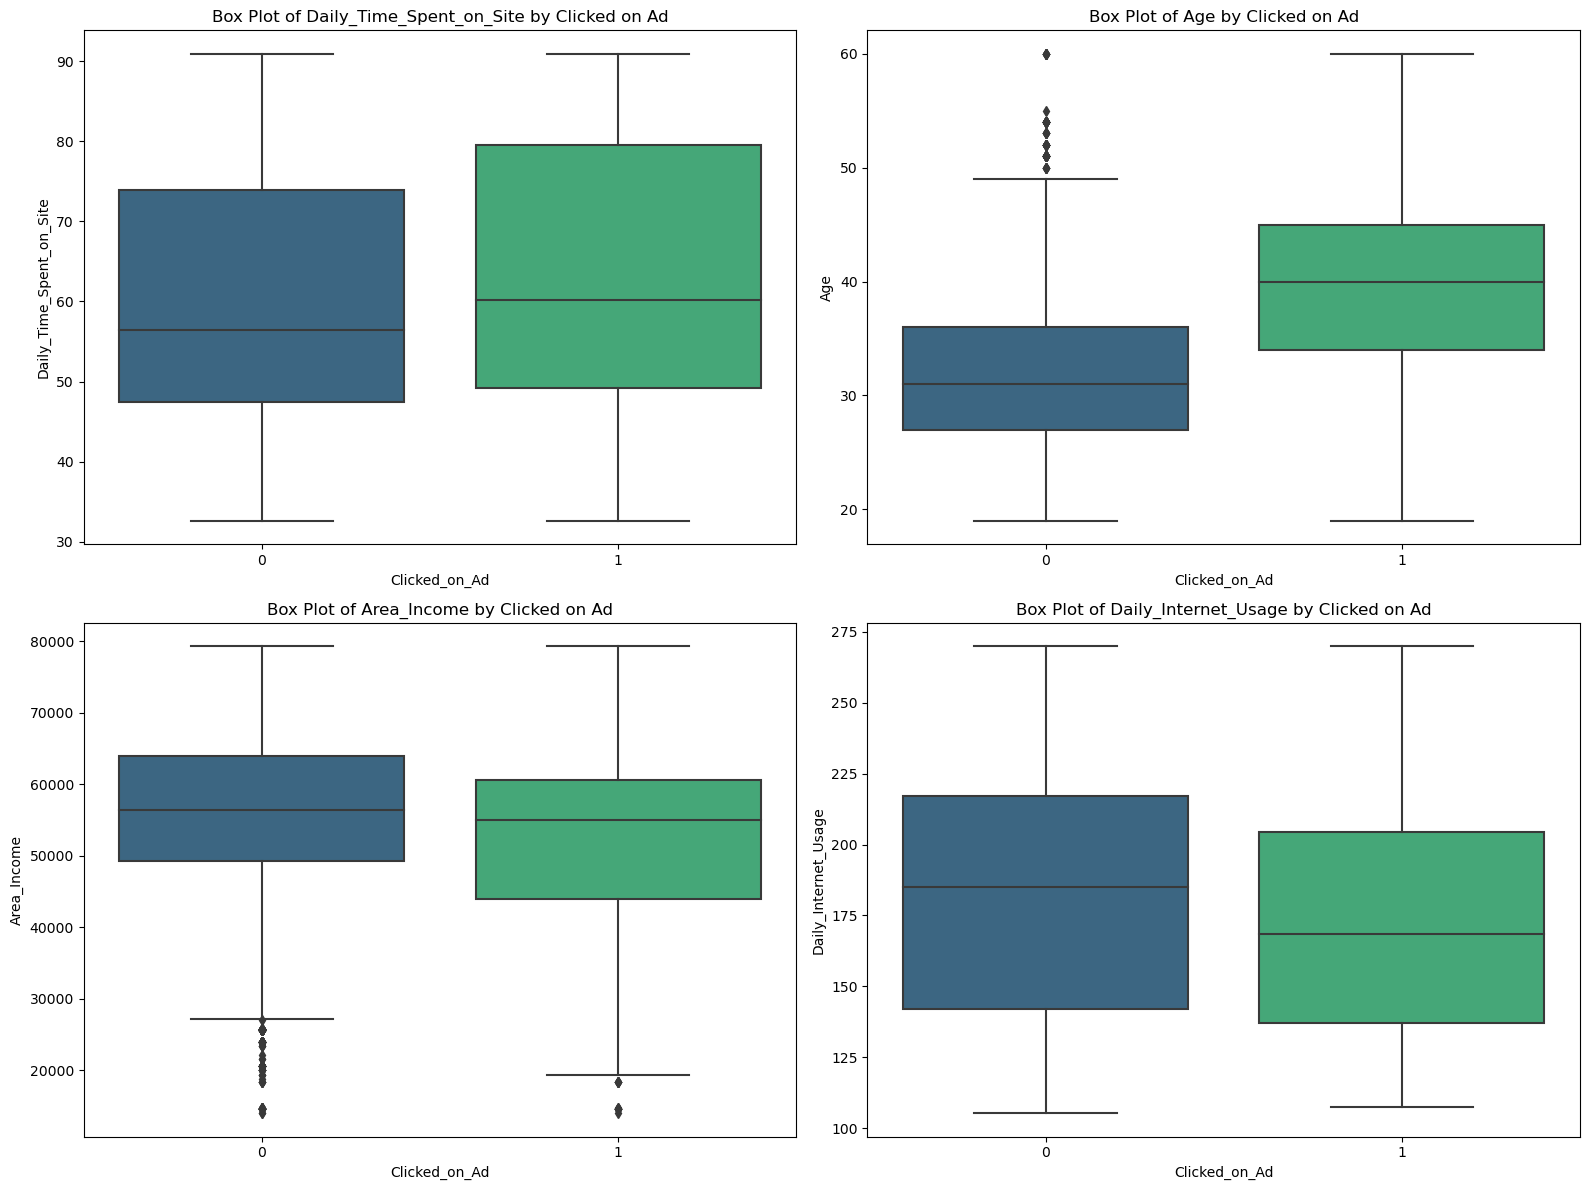

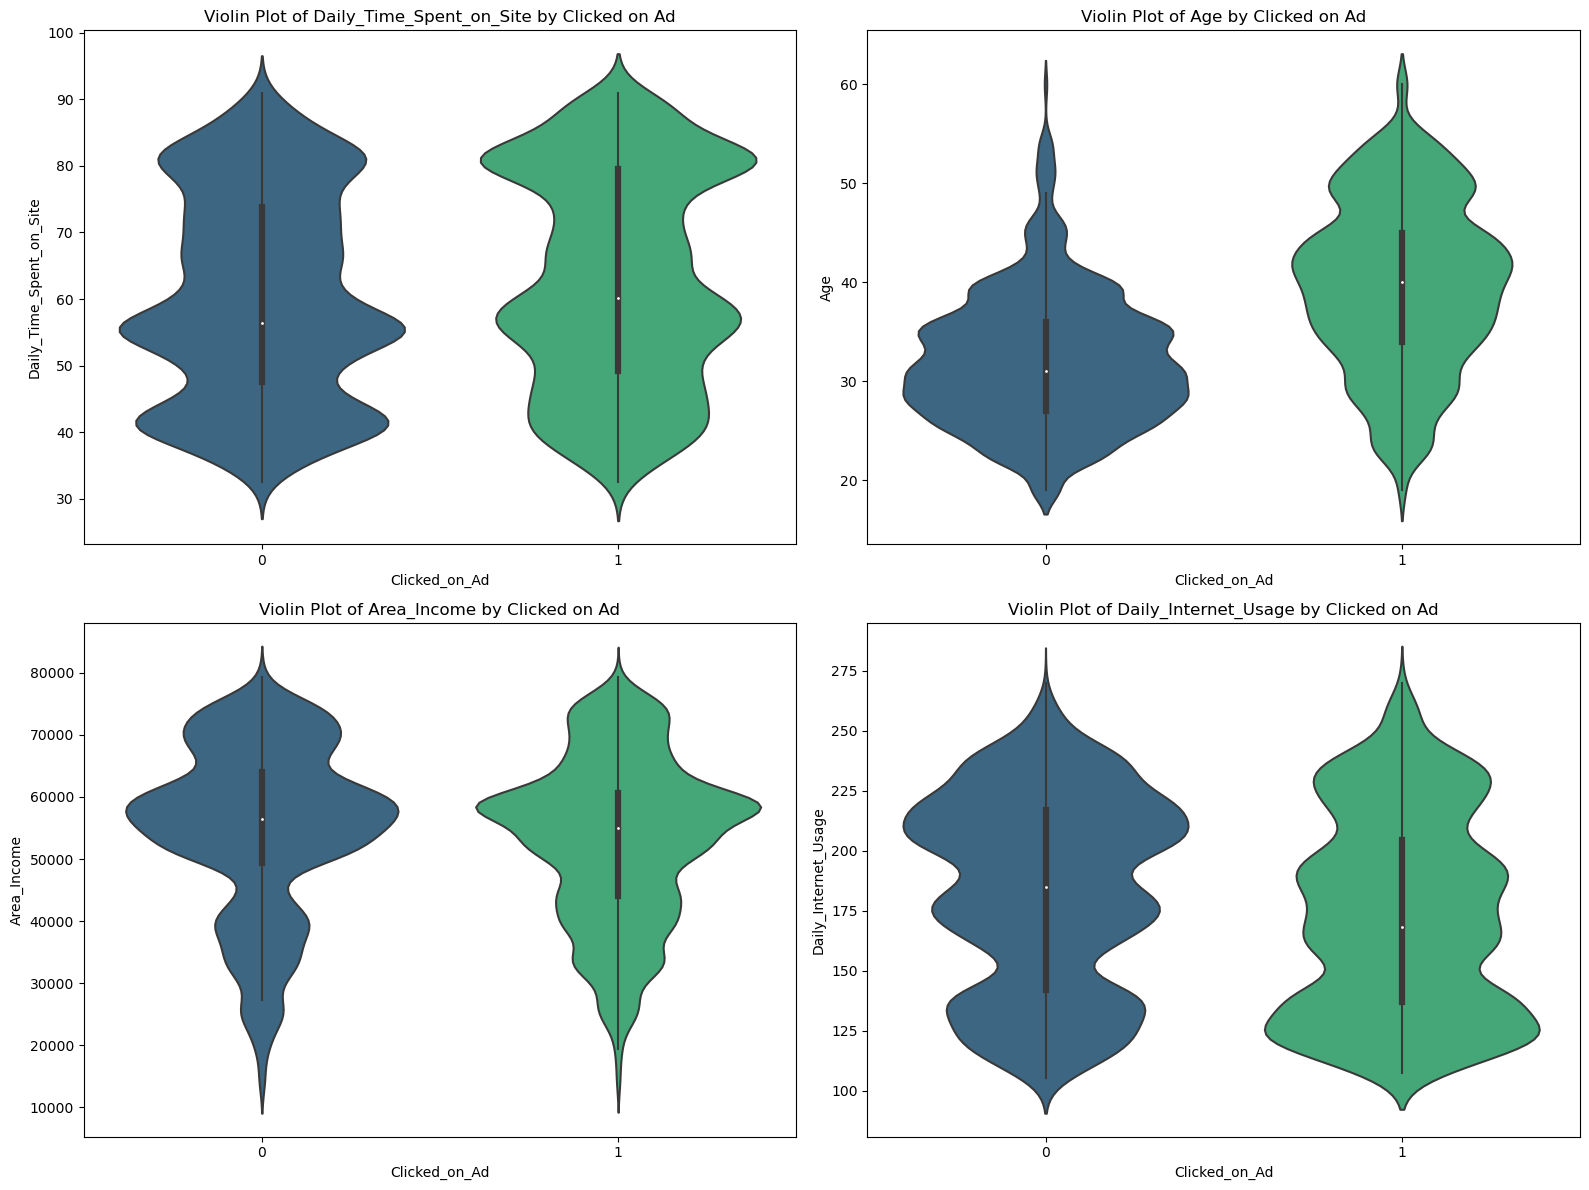

In [35]:
plt.figure(figsize=(16, 12))
for i, var in enumerate(data_num.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Clicked_on_Ad', y=var, data=data, palette='viridis')
    plt.title(f'Box Plot of {var} by Clicked on Ad')

plt.tight_layout()
plt.show()
plt.figure(figsize=(16, 12))
for i, var in enumerate(data_num.columns):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Clicked_on_Ad', y=var, data=data, palette='viridis')
    plt.title(f'Violin Plot of {var} by Clicked on Ad')

plt.tight_layout()
plt.show()

### Models

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  dont wanna use time stamp cause i have separated day , time ,...
data.drop(['Timestamp'], axis=1, inplace=True)

# encoding cat variables 
label_encoders = {}
for column in ['Ad_Topic_Line', 'City', 'Gender', 'Country', 'month', 'day', 'hour']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# input and output variables are
X = data.drop('Clicked_on_Ad', axis=1)
y = data['Clicked_on_Ad'].astype(int)  # Ensure the target is integer type

# splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## this is the models that i am using 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
# cross val
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
# evaluating:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Logistic Regression Cross-Validation Accuracy: 0.6971 ± 0.0103
Decision Tree Cross-Validation Accuracy: 0.7486 ± 0.0083
XGBoost Cross-Validation Accuracy: 0.8624 ± 0.0114

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1011
           1       0.69      0.67      0.68       946

    accuracy                           0.69      1957
   macro avg       0.69      0.69      0.69      1957
weighted avg       0.69      0.69      0.69      1957

Accuracy: 0.6924
Confusion Matrix:
[[725 286]
 [316 630]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1011
           1       0.76      0.77      0.76       946

    accuracy                           0.77      1957
   macro avg       0.77      0.77      0.77      1957
weighted avg       0.77      0.77      0.77      1957

Accuracy: 0.7726
Confusion Matrix:


##### 가장 잘 동작한 모델 XGBoost 이지만, Desicion Tree도 잘 동작됨
##### Logistic Regression은 좋은 결과를 제공하지 않음

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cv_results = {
    'Logistic Regression': {'mean': 0.6997, 'std': 0.0119},
    'Decision Tree': {'mean': 0.7571, 'std': 0.0082},
    'XGBoost': {'mean': 0.8634, 'std': 0.0074}
}
classification_reports = {
    'Logistic Regression': {'precision': [0.68, 0.71], 'recall': [0.74, 0.65], 'f1-score': [0.71, 0.68], 'support': [1014, 986]},
    'Decision Tree': {'precision': [0.80, 0.77], 'recall': [0.77, 0.81], 'f1-score': [0.78, 0.79], 'support': [1014, 986]},
    'XGBoost': {'precision': [0.88, 0.87], 'recall': [0.88, 0.88], 'f1-score': [0.88, 0.88], 'support': [1014, 986]}
}
confusion_matrices = {
    'Logistic Regression': np.array([[748, 266], [346, 640]]),
    'Decision Tree': np.array([[776, 238], [190, 796]]),
    'XGBoost': np.array([[889, 125], [119, 867]])
}

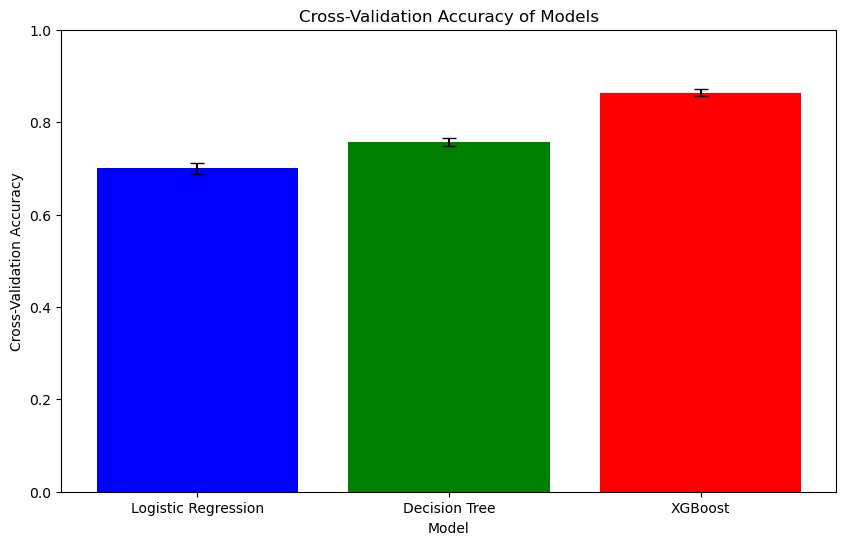

In [42]:
# barplot for accuracies
plt.figure(figsize=(10, 6))
model_names = list(cv_results.keys())
cv_means = [cv_results[model]['mean'] for model in model_names]
cv_stds = [cv_results[model]['std'] for model in model_names]
plt.bar(model_names, cv_means, yerr=cv_stds, capsize=5, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy of Models') # 모델의 교차 검증 정확도
plt.ylim(0, 1)
plt.show()

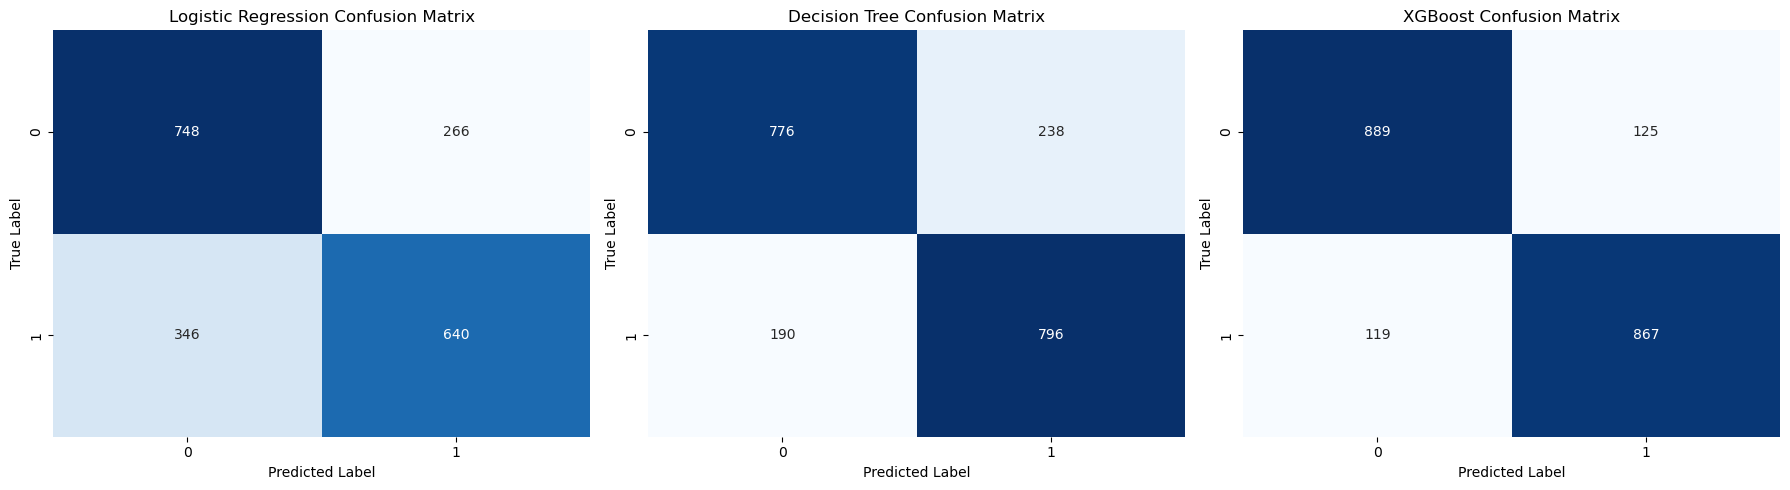

In [45]:
# confusion matrix 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

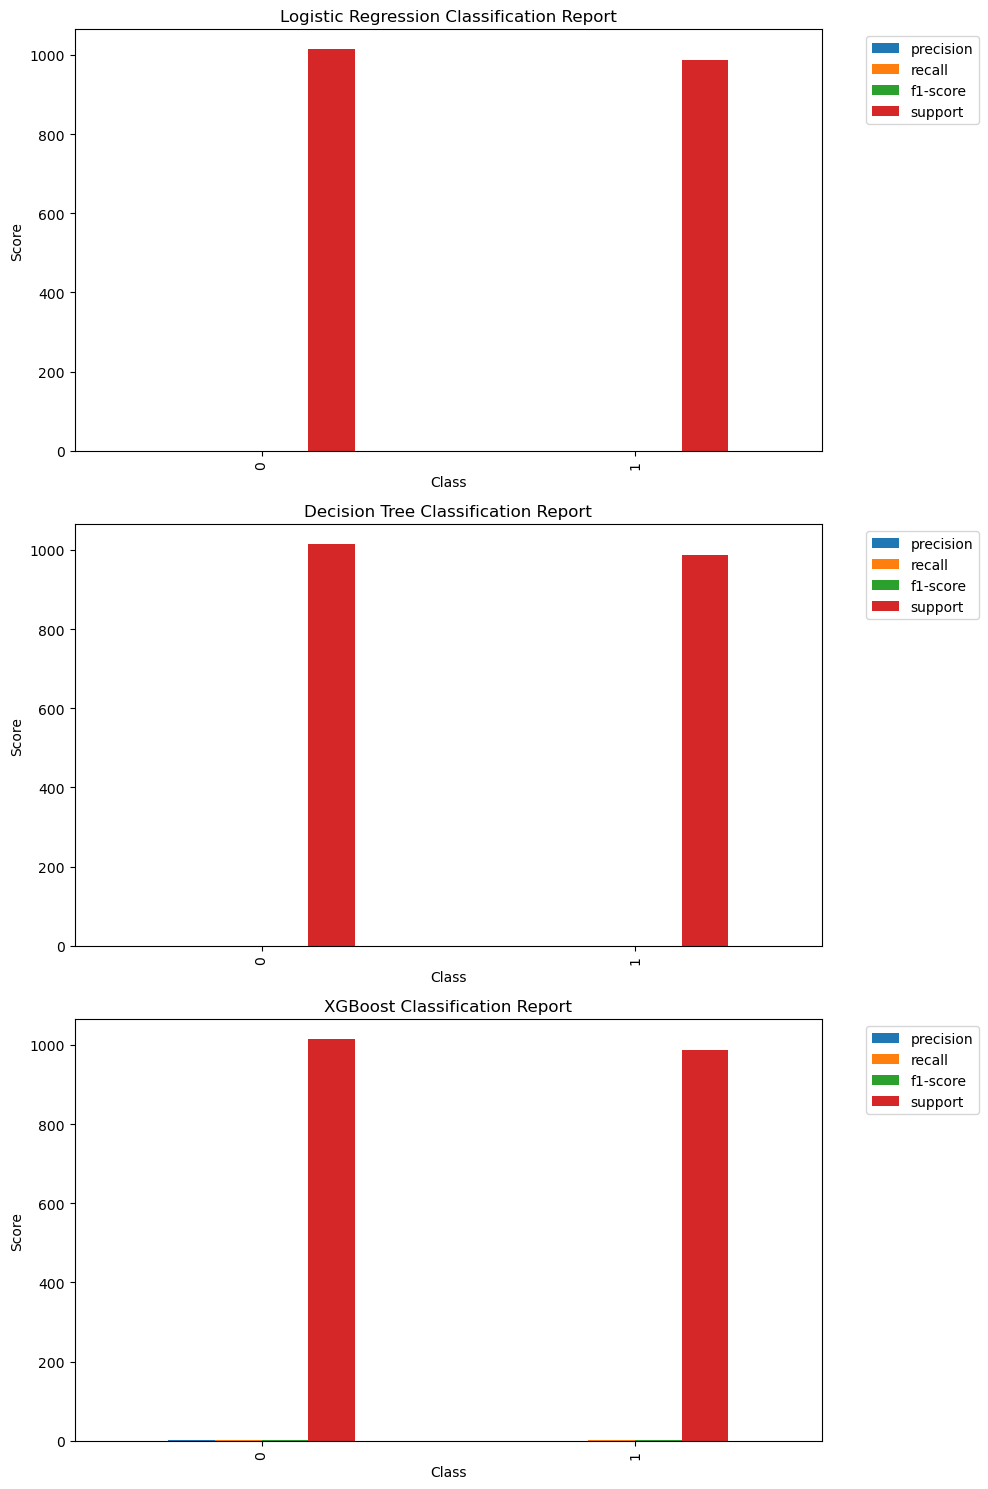

In [44]:
## barplot for each label 
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, (model_name, report) in zip(axes, classification_reports.items()):
    df_report = pd.DataFrame(report, index=['0', '1'])
    df_report.plot(kind='bar', ax=ax)
    ax.set_title(f'{model_name} Classification Report')
    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### support 값이 압도적이어서 다른 지표 값을 확인할 수 없음 고로 support를 제외하고 다시 그려보는게 좋음

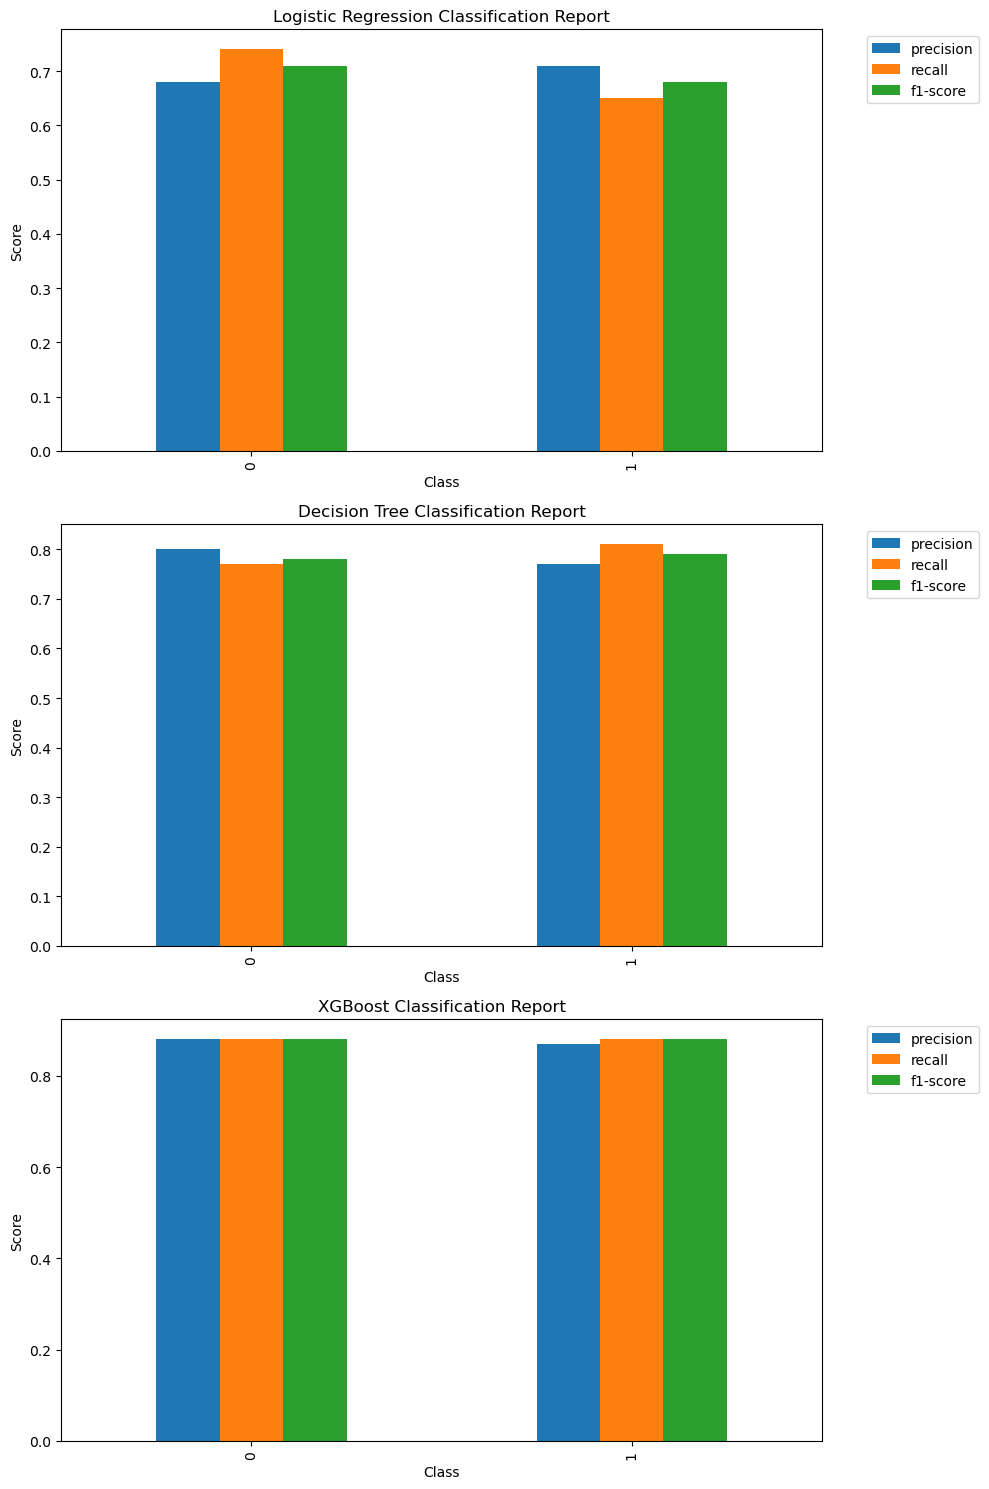

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, (model_name, report) in zip(axes, classification_reports.items()):
    # 'support'를 제외한 나머지 항목들만 선택
    df_report = pd.DataFrame({k: v for k, v in report.items() if k != 'support'}, index=['0', '1'])
    df_report.plot(kind='bar', ax=ax)
    ax.set_title(f'{model_name} Classification Report')
    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### XGBoost 모델이 precision, recall, f1-score에서 가장 높은 성능을 보임